In [1]:
#De f ining s i g n a l s ( t ) and independent v a r i a b l e t
#t=seq ( 0 , 1 0 0 , 0 . 0 1 )
#s=0.4* cos ( 3 . 5 * t )+0.9* cos (4* t )
#Pl o t t ing s i g n a l s ( t )
#pl o t ( t , s , type=" l ")
import numpy as np
import matplotlib.pyplot as plt

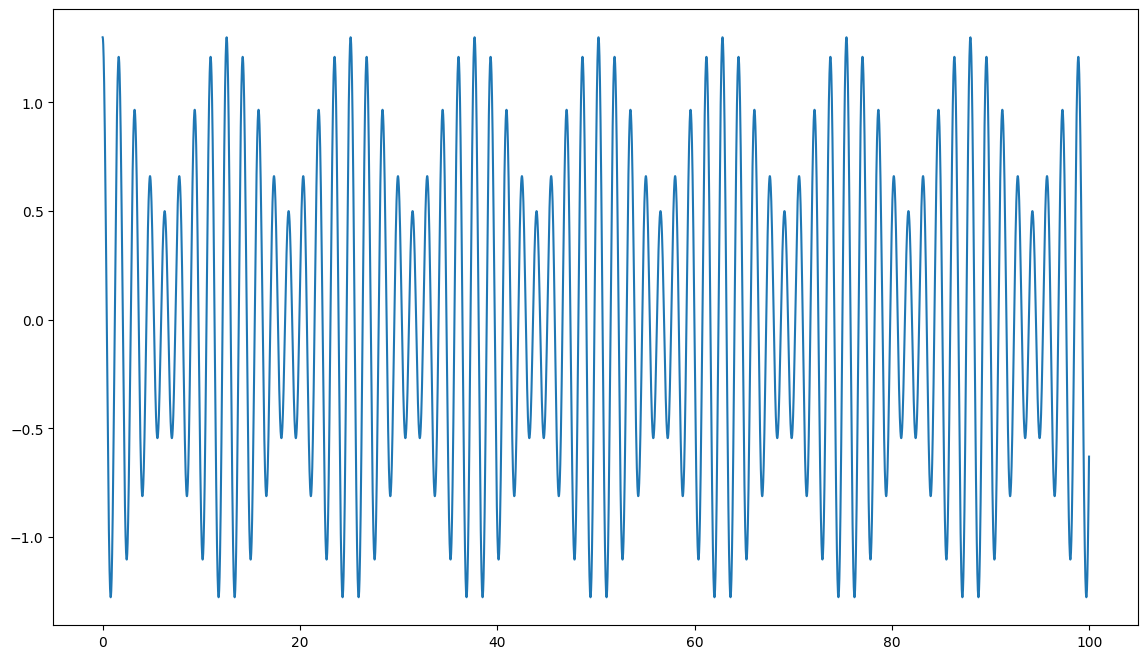

In [5]:
t = np.arange(0,100,0.01)
s = 0.4*np.cos(3.5*t) + 0.9*np.cos(4*t)

plt.figure(figsize=(14, 8))
plt.plot(t, s)
plt.show()